# Data visualization

Data visualization is an essential skill for an astrophysicist, 
and anyone working with data. A well-made plot facilitates learning 
and is often key for interpreting data. There exist many tools and 
software packages to plot data, we will focus on the popular python library called matplotlib.
Matplotlib can, at times, be difficult to work with, but it offers a 
high level of customization. Unfortunately, creating good plots is time-consuming. 
It is hard to teach someone how to make good plots, it is very much a skill one has to acquire by doing. 

Luckily, we do not have to remember all the details if we know how to google things. 
A good understanding of the core aspects and google will get you a long way. 
The examples below are based on how I prefer to do things, but other approaches are equally good. 


## Matplotlib and pyplot
Matplotlib has a deep and complicated interface that lets you change every detail of a plot. 
However, that power comes with the cost of complexity. The sublibrary pyplot is a handy 
tool that lets you make simple plots without too much work. 
Oftentimes, pyplot functionality wraps several matplotlib elements into one. 
In practice, I find myself using the pyplot interface 
in conjuncture with the lower-level matplotlib functions.

Pyplot is most of the time imported as plot, a typical import statement looks like

```python
import matplotlib
from matplotlib import pyplot as plt
```

Some basic commands:

```python
plt.plot(x,y) #plots y versus x.
plt.xlim([xmin,xmax]) #sets the range of the x-axis
plt.ylim([xmin,xmax]) #sets the range of the y-axis
plt.savefig('name') #saves the plot, the filetype is set by the extension ie .png, .jpg, .pdf and so on
#If you find that the margins of the plots are to large use
plt.savefig('name',box_inches='tight')
```




In [4]:
#Import matplotlib and pyplot as shown above
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#Use the plt.plot function to plot y versus x.
import numpy as np
x = np.linspace(0,10,100)
y = 5*np.cos(500*2*np.pi*x + 0.1)*np.exp(-x/3) + 2
#plt. ....


We can use the subplots functionality to have more control over the figure. Note that there are easier ways to do this, but using subplots sets you up for an easier workflow later.

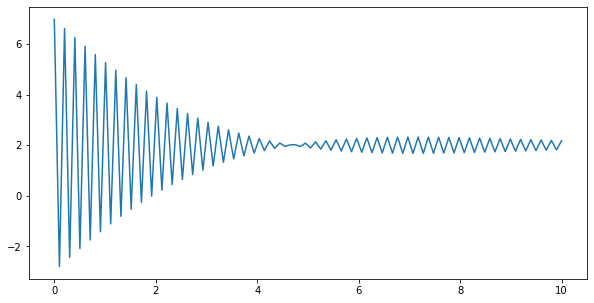

In [24]:
f,ax = plt.subplots(figsize=(10,5)) 
#here f represents the whole figure object and ax the different
#subplots in the figure, this will become clearer later
ax.plot(x,y)

Notice how the plot is larger, but now the text is a bit small.
You can change this by updating the plot parameters.
Normally, what you want to do is to find a set of parameters that works for your
problem and use them for all your plots.

There are many parameters and many ways to change them. We will use

```python 
plt.rcParams["font.size"] = "18"
```

In [37]:
#Redo the plot from above, but with fontsize 18.

As mentioned, there are many rcParms, you can find a full list here
https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams
    
I prefer to set them goblay at the start of my file

```python
matplotlib.rcParams.update({'font.size': 14}) #change as needed

#Sets the direction of the tick marks, this is a matter of style
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
#I want tick marks all around my plot
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True 

#For generating plots for latex and using latex in plots
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex' 
matplotlib.rcParams.update({'pgf.rcfonts' : False}) 

#Adjust the size of the ticks
matplotlib.rcParams['axes.linewidth'] = 2 
matplotlib.rcParams['xtick.major.size'] = 6 
matplotlib.rcParams['xtick.major.width'] = 2 
matplotlib.rcParams['xtick.minor.size'] = 4 
matplotlib.rcParams['xtick.minor.width'] = 0.5 
 
matplotlib.rcParams['ytick.major.size'] = 6 
matplotlib.rcParams['ytick.major.width'] = 2 
matplotlib.rcParams['ytick.minor.size'] = 4 
matplotlib.rcParams['ytick.minor.width'] = 0.5

#Sometimes needed in jupyter notebooks
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'
```

In [35]:
matplotlib.rcParams.update({'font.size': 18}) #change as needed

#Sets the direction of the tick marks, this is a matter of style
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
#I want tick marks all around my plot
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True 

#For generating plots for latex and using latex in plots
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex' 
matplotlib.rcParams.update({'pgf.rcfonts' : False}) 

#Adjust the size of the ticks
matplotlib.rcParams['axes.linewidth'] = 2 
matplotlib.rcParams['xtick.major.size'] = 6 
matplotlib.rcParams['xtick.major.width'] = 2 
matplotlib.rcParams['xtick.minor.size'] = 4 
matplotlib.rcParams['xtick.minor.width'] = 0.5 

matplotlib.rcParams['ytick.major.size'] = 6 
matplotlib.rcParams['ytick.major.width'] = 2 
matplotlib.rcParams['ytick.minor.size'] = 4 
matplotlib.rcParams['ytick.minor.width'] = 0.5

#Sometimes needed in jupyter notebooks
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'

In [17]:
#Redo the plot from above and see how it changes. You can adjust it as you want, if you want.


## Two for the price of one

subplots() allow us to specify how many panels we want in our plot, it is done in a
matrix-like manner (specify the number of rows and columns).

The code
```python
f,ax = plt.subplots(figsize=(10,5),nrows=2,ncols=2)
```
would give us a plot with four panels in a two-by-two grid.
The variable ```ax``` becomes an array where each element corresponds to
a specific panel. If nrows or ncols is equal to one then ax becomes a vector, if not
ax will be two-dimensional array.


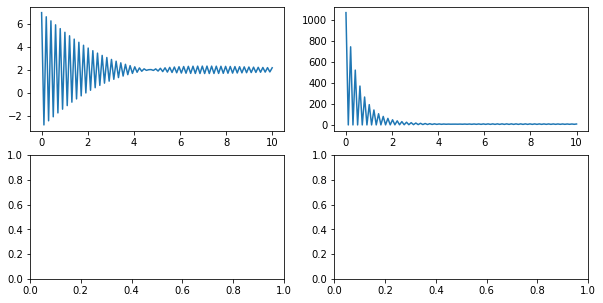

In [9]:
x = np.linspace(0,10,100)
y = 5*np.cos(500*2*np.pi*x + 0.1)*np.exp(-x/3) + 2
f,ax = plt.subplots(figsize=(10,5),nrows=2,ncols=2)
ax[0,0].plot(x,y)
ax[0,1].plot(x,np.exp(y))
#try to plot some data in the last two panels

As you might have noticed, the panels are a bit small now and the text is also small.
To make a good plot, it is important to adjust the plot parameters to make the plots look nice.

I find the command

```python
plt.subplots_adjust(wspace=0.1,hspace=0.1)
```
useful to adjust the horizontal (hspace) and vertical (wspace) between plots.

The sharex and sharey keywords for plt.subplots are also useful for formatting the plots.

```python
f,ax = plt.subplots(figsize=(10,5),nrows=2,ncols=2,sharex=..,sharey=...)
```

>sharex, shareybool or {'none', 'all', 'row', 'col'}, default: False \
> &nbsp; &nbsp; &nbsp; &nbsp; Controls sharing of properties among x (sharex) or y (sharey) axes: \
> &nbsp;&nbsp; &nbsp; &nbsp; - True or 'all': x- or y-axis will be shared among all subplots. \
> &nbsp;&nbsp; &nbsp; &nbsp; - False or 'none': each subplot x- or y-axis will be independent.\
> &nbsp;&nbsp; &nbsp; &nbsp; - 'row': each subplot row will share an x- or y-axis.\
> &nbsp;&nbsp; &nbsp; &nbsp; - 'col': each subplot column will share an x- or y-axis.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

## Dealing with the ax elements instead of using plt.something
Functionality from pyplot (plt) will often change global plot properties if you want to adjust
the individual panels that need to be done using the ax elements. Confusingly, the commands are slightly different

### Useful commands for ax elements
In this example, we are working with the 0,1 element of ax, but these commands can be used on any element of the ax
array.
```python
ax[0,1].set_xlim([star,end])
ax[0,1].set_ylim([star,end])
ax[0,1].set_xlabel(label)
ax[0,1].set_ylabel(label)
ax[0,1].set_xscale(value) # value : {"linear", "log", "symlog", "logit", ...}
```
See https://matplotlib.org/stable/api/axes_api.html for all the details.

# Excercise
Plot f(x)=x^3-2x^2-3x+2 and, its first, second, and third derivatives in one plot with four panels.
Let x lie between -2 and 3.

In [10]:
##
#f,ax = ...

# What is next?
Matplotlib contains much more than what we have covered here. There are various two-dimensional plot methods as well as three-dimensional plotting. These concepts go somewhat beyond what we want to cover here, but some examples are included below. 

Text(0, 0.5, 'y')

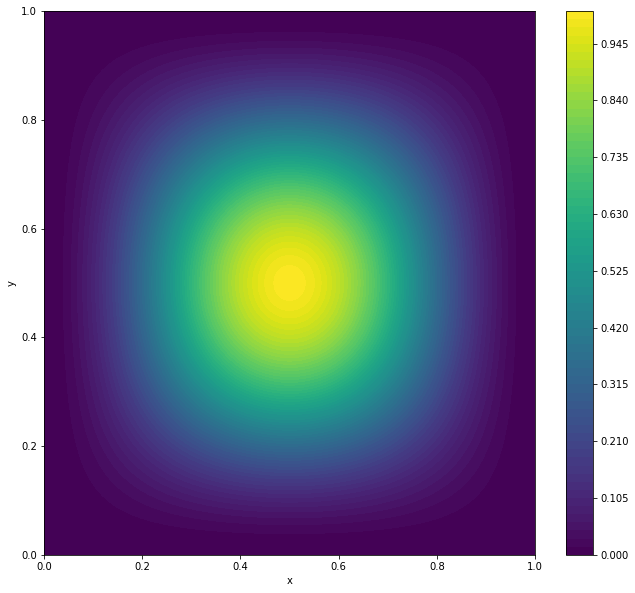

In [53]:
#Define what we want to plot. This is the wavefunction for a particle in a squar infinit box
def wave_function(x,y,nx,ny,Lx,Ly):
    return np.sin(nx*np.pi*x/Lx)*np.sin(nx*np.pi*y/Ly)

x = np.linspace(0,1,500)
y = np.linspace(0,1,500)

#Set up the ground-state for a 1x1 box
#the loops here are not the best way to do this, but
#its easier to understand what is going on.
ground_state = np.zeros([len(x),len(y)])
for i,xi in enumerate(x):
    for j,yi in enumerate(y):
        ground_state[i,j] = np.abs(wave_function(xi,yi,1,1,1,1))**2


f,ax = plt.subplots(figsize=(11,10)) #The colorbar takes some space
contour_plot = ax.contourf(x,y,ground_state,75) 
#We plot 75 contours here, contourf fills the contours, just contour for unfilled.
f.colorbar(contour_plot)
ax.set_xlabel("x")
ax.set_ylabel("y")

#Use tricontourf if you have 1d data or data that is not spaced evenly.

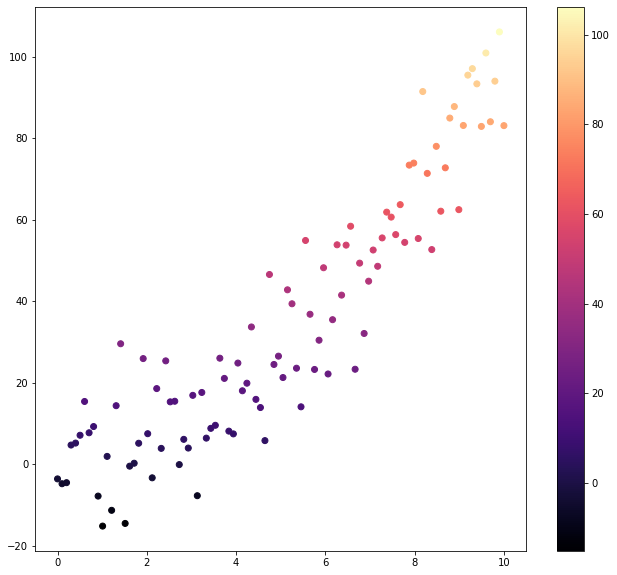

In [34]:
#A simple scatter plot
f,ax = plt.subplots(figsize=(11,10))
x = np.linspace(0, 10, num=100)
y = x ** 2 + 10 * np.random.randn(100)
s = ax.scatter(x, y, c=y, cmap='magma') #c =y gives the dots color by the y value
f.colorbar(s)


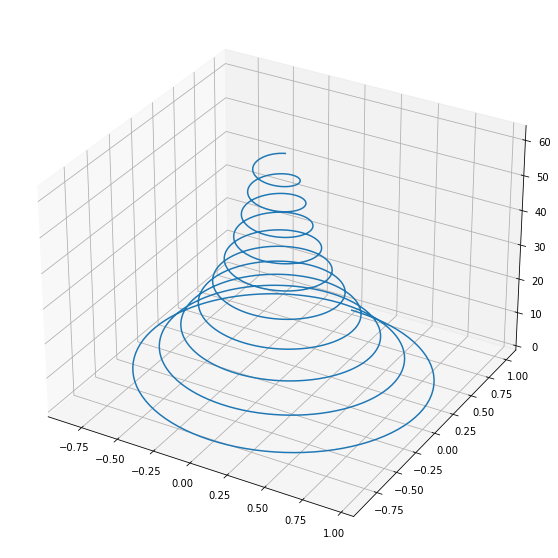

In [50]:
from mpl_toolkits.mplot3d import axes3d

f,ax = plt.subplots(figsize=(11,10),subplot_kw=dict(projection='3d'))
t = np.linspace(0,10*2*np.pi,1000)
X, Y, Z = np.sin(t)*np.exp(-t/30),np.cos(t)*np.exp(-t/30),t

ax.plot(X, Y, Z)  # Plot contour curves

#plt.show()

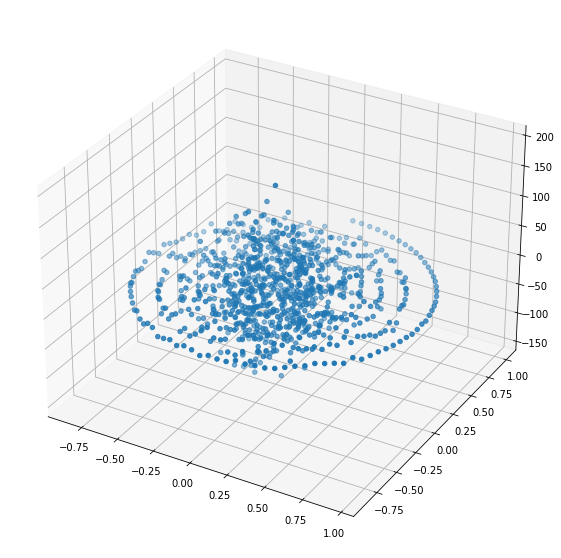

In [52]:
from mpl_toolkits.mplot3d import axes3d
f,ax = plt.subplots(figsize=(11,10),subplot_kw=dict(projection='3d'))
t = np.linspace(0,10*2*np.pi,1000)
X, Y, Z = np.sin(t)*np.exp(-t/30),np.cos(t)*np.exp(-t/30),np.random.randn(len(t))*t

ax.scatter(X, Y, Z)  # Plot contour curves

#plt.show()